# Book Recommendation System

## Problem Statement

Recommendation systems are used in hundreds of different services - everywhere from online shopping to music to movies.

Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors.

The main objective of our project is to create book recommendation systems for users according to the features.

# Importing  Libraries

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')
import sys
import random

import re # Import the re module for regular expressions

## Loading all three datasets

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Books.csv to Books.csv


In [3]:
books = pd.read_csv('Books.csv',encoding='latin-1')
books


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [4]:
from google.colab import files
uploaded = files.upload()

Saving Users.csv to Users.csv


In [5]:
users = pd.read_csv('Users.csv')


In [6]:
from google.colab import files
uploaded = files.upload()

Saving Ratings.csv to Ratings.csv


In [7]:
ratings = pd.read_csv('Ratings.csv')

- ### Books Data

In [75]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [76]:
books.shape

(271360, 8)

- ### Users Data

In [77]:
users.head(2)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [78]:
users.shape

(278858, 3)

- ### Ratings Data

In [79]:
ratings.head(2)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


# EDA

- ## Merging users and ratings dataset

In [80]:
users_rating= users.merge(ratings,on='User-ID')
users_rating

,User-ID,Location,Age,ISBN,Book-Rating
0,2,"stockton, california, usa",18.0,0195153448,0
1,7,"washington, dc, usa",NaN,034542252,0
2,8,"timmins, ontario, canada",NaN,0002005018,5
3,8,"timmins, ontario, canada",NaN,0060973129,0
4,8,"timmins, ontario, canada",NaN,0374157065,0
...,...,...,...,...,...
1149775,278854,"portland, oregon, usa",NaN,0425163393,7
1149776,278854,"portland, oregon, usa",NaN,0515087122,0
1149777,278854,"portland, oregon, usa",NaN,0553275739,6
1149778,278854,"portland, oregon, usa",NaN,0553578596,0


- #### Merging books with users and ratings dataset

In [81]:
new_data= users_rating.merge(books,on='ISBN')
new_data.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,11400,"ottawa, ontario, canada",49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,11676,"n/a, n/a, n/a",NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
4,41385,"sudbury, ontario, canada",NaN,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [82]:
new_data.shape

(1031136, 12)

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1031136 non-null  int64  
 1   Location             1031136 non-null  object 
 2   Age                  753301 non-null   float64
 3   ISBN                 1031136 non-null  object 
 4   Book-Rating          1031136 non-null  int64  
 5   Book-Title           1031136 non-null  object 
 6   Book-Author          1031135 non-null  object 
 7   Year-Of-Publication  1031136 non-null  object 
 8   Publisher            1031134 non-null  object 
 9   Image-URL-S          1031136 non-null  object 
 10  Image-URL-M          1031136 non-null  object 
 11  Image-URL-L          1031132 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 102.3+ MB


## Check for null values

In [83]:
new_data.isnull().sum()

User-ID                     0
Location                    0
Age                    277835
ISBN                        0
Book-Rating                 0
Book-Title                  0
Book-Author                 1
Year-Of-Publication         0
Publisher                   2
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 4
dtype: int64

In [84]:
new_data=new_data.dropna()

In [ ]:
new_data.isnull().sum()

User-ID                0
Location               0
Age                    0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [85]:
new_data.shape

(753296, 12)

## Checking for duplicate values

In [86]:
new_data.duplicated().sum()

0

In [87]:
new_data.describe()

,User-ID,Age,Book-Rating
count,753296.000000,753296.000000,753296.000000
mean,141231.207581,37.397658,2.768896
std,78828.594808,14.098257,3.864231
min,2.000000,0.000000,0.000000
25%,74453.000000,28.000000,0.000000
50%,141493.000000,35.000000,0.000000
75%,209156.000000,45.000000,7.000000
max,278852.000000,244.000000,10.000000


 We can see Age column has max value of 244 which is definitely a outlier

## Outlier detection

In [88]:
outliers=new_data[new_data["Age"]>100]
outliers.tail()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1025428,267830,"fort worth, texas, usa",101.0,0931722179,10,Nekkid cowboy,Katie Breeze,1982,Corona Pub. Co,http://images.amazon.com/images/P/0931722179.0...,http://images.amazon.com/images/P/0931722179.0...,http://images.amazon.com/images/P/0931722179.0...
1025429,267830,"fort worth, texas, usa",101.0,0965870707,8,Threadbear: A Story of Christian Healing for A...,Tilda Norberg,1997,Penn Haus Press,http://images.amazon.com/images/P/0965870707.0...,http://images.amazon.com/images/P/0965870707.0...,http://images.amazon.com/images/P/0965870707.0...
1025430,267830,"fort worth, texas, usa",101.0,1559345233,8,"Frauds, Myths, and Mysteries: Science and Pseu...",Kenneth L. Feder,1996,McGraw Hill College Div,http://images.amazon.com/images/P/1559345233.0...,http://images.amazon.com/images/P/1559345233.0...,http://images.amazon.com/images/P/1559345233.0...
1025431,267830,"fort worth, texas, usa",101.0,1565301935,9,Cigar Chic: A Woman's Perspective,Tomima Edmark,1995,Summit Publishing Group,http://images.amazon.com/images/P/1565301935.0...,http://images.amazon.com/images/P/1565301935.0...,http://images.amazon.com/images/P/1565301935.0...
1029329,276048,"wien, wien, austria",127.0,0139531831,0,PC Power Secrets: How to Make Any PC Run Faster,Stephen J. Dougherty,1992,M&amp;T Press,http://images.amazon.com/images/P/0139531831.0...,http://images.amazon.com/images/P/0139531831.0...,http://images.amazon.com/images/P/0139531831.0...


In [89]:
outliers.shape

(2910, 12)

- There are 2910 people whose age is greater than 100 years so we treat them as outliers and remove them

## Removing outliers

In [90]:
new_data=new_data[new_data["Age"]<100]

In [91]:
new_data.head(2)

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
2,11400,"ottawa, ontario, canada",49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


# Data Pre-processing

- #### Creating 3 new columns city,state and country from the Location column

In [92]:
new_data[['city' , 'state' , 'country']] = new_data['Location'].str.split(',', expand=True , n=2)
new_data.drop(columns="Location",inplace=True)

In [93]:
new_data.head(2)

,User-ID,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,city,state,country
0,2,18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,stockton,california,usa
2,11400,49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,ottawa,ontario,canada


## Data Visualization

#### Age Distribution of users

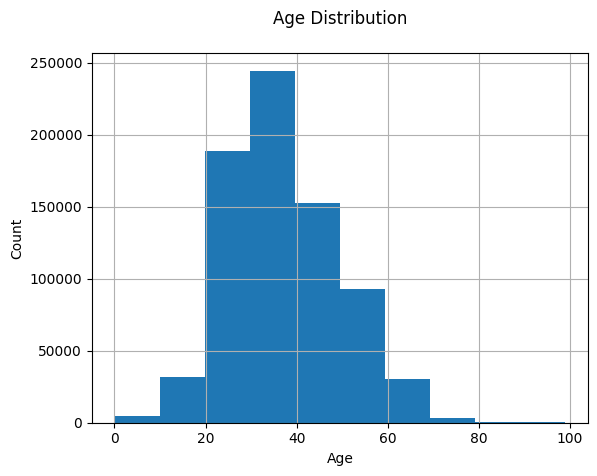

In [94]:
new_data["Age"].hist()
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

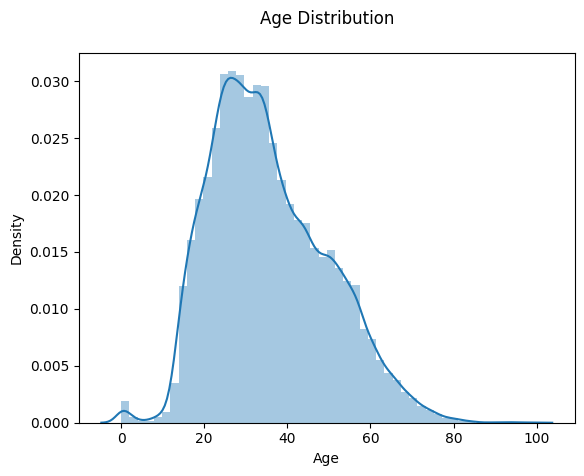

In [95]:
#Age distribution of users
age_df=users[users['User-ID'].isin(list(new_data['User-ID'].unique()))]
sns.distplot(age_df.Age)
plt.title('Age Distribution\n')
plt.show()

- The majority of readers are between the ages of 25 and 40.
- Readers who are 80 to 100 years old make up a tiny minority.

### Rating Distribution

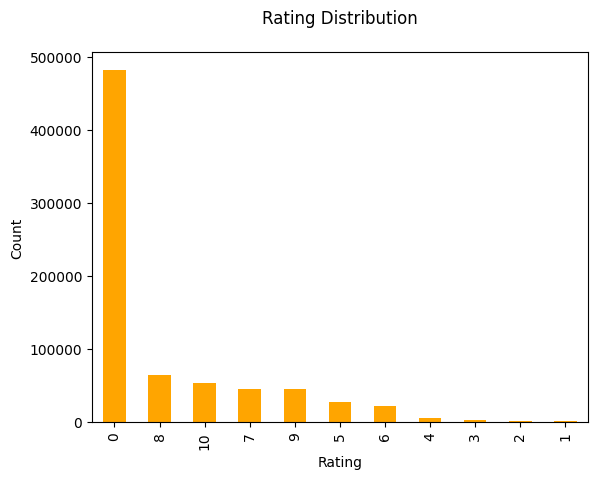

In [96]:
new_data["Book-Rating"].value_counts(sort=True).plot(kind='bar',color="orange")
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

- There are nearly 480000 books that have zero ratings

In [97]:
non_zero_rated_books=new_data[new_data["Book-Rating"]!=0]
non_zero_rated_books.head()

,User-ID,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,city,state,country
5,67544,30.0,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,toronto,ontario,canada
13,219008,60.0,0002005018,7,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,halifax,nova scotia,canada
14,263325,27.0,0002005018,6,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,fredericton,new brunswick,canada
16,2954,71.0,0060973129,8,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,wichita,kansas,usa
17,152827,40.0,0060973129,7,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,ottawa,ontario,canada


<Axes: title={'center': '\nMost popular ratings\n'}, xlabel='Book-Rating', ylabel='count'>

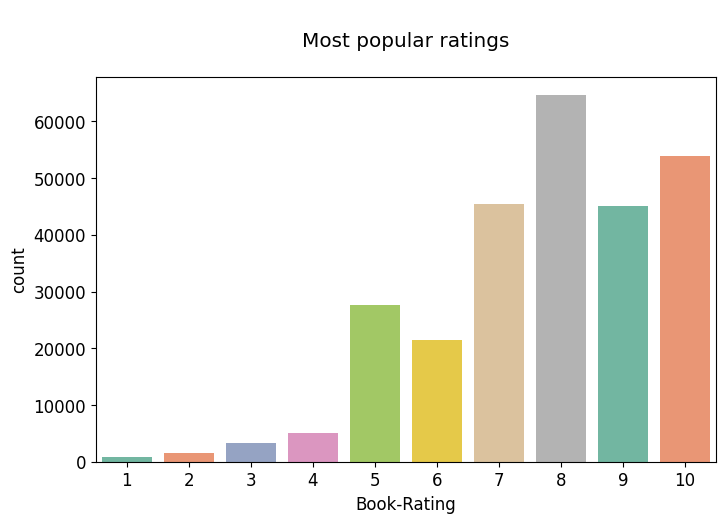

In [98]:
# most popular rating among non zero rated books
plt.figure(figsize=[8,5])
plt.rc('font', size=12)
plt.title('\nMost popular ratings\n')
sns.countplot(data=new_data, x=non_zero_rated_books["Book-Rating"],palette='Set2')

- Most of users have given above 4 ratings to books
- 8 is the most common rating given by users

## Publisher with most books

Text(0.5, 1.0, 'Top ten publishers')

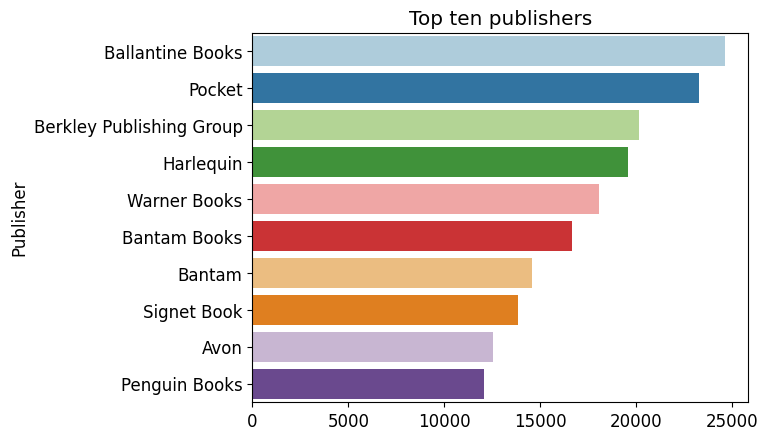

In [99]:
#Companies with the most number of books published
popular_publishers=new_data.groupby('Publisher')['Book-Title'].count().nlargest(10)
sns.barplot(x=popular_publishers.values,y=popular_publishers.index,palette='Paired')
plt.title('Top ten publishers')

Ballantine Books is most popular publisher based on the number of users who have rated their books

### Top Selling Books

In [100]:
new_data.groupby('Book-Title')['User-ID'].count().nlargest(10)

Book-Title
Wild Animus                                        2137
The Lovely Bones: A Novel                           917
The Da Vinci Code                                   703
Bridget Jones's Diary                               599
The Nanny Diaries: A Novel                          572
Angels &amp; Demons                                 548
The Secret Life of Bees                             544
A Painted House                                     514
Divine Secrets of the Ya-Ya Sisterhood: A Novel     513
Life of Pi                                          513
Name: User-ID, dtype: int64

Text(0.5, 1.0, 'Top selling books')

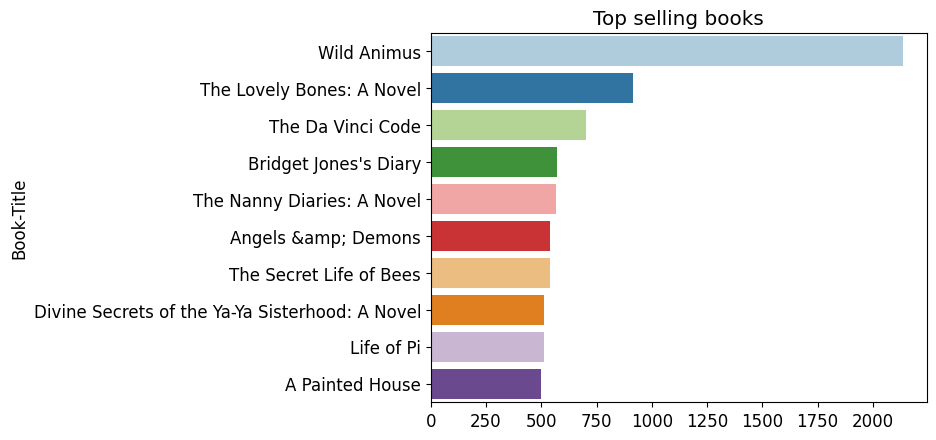

In [101]:
#Top selling books
most_purchased_books=new_data.groupby('Book-Title')['User-ID'].nunique().nlargest(10)
sns.barplot(x=most_purchased_books.values,y=most_purchased_books.index,palette='Paired')
plt.title('Top selling books')

### Most Popular Author

<Axes: title={'center': '\nMost popular Authors\n'}, xlabel='Book-Rating', ylabel='Book-Author'>

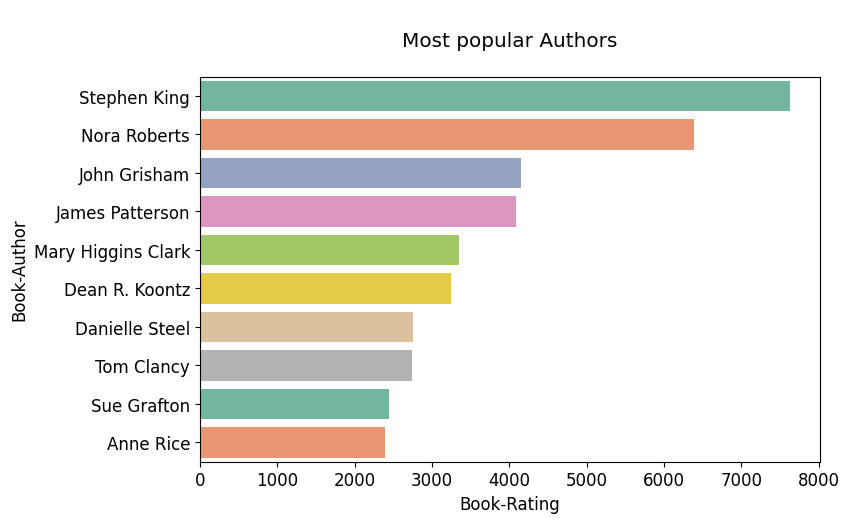

In [102]:
# most popular book authors
author = new_data.groupby('Book-Author')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]
plt.figure(figsize=[8, 5])
plt.rc('font', size=12)
plt.title('\nMost popular Authors\n')
sns.barplot(data=author, y='Book-Author', x='Book-Rating',palette='Set2')

Most popular book author with respect to the number of ratings is Stephen King.

## Top Rated Book

Text(0.5, 1.0, 'Top rated books')

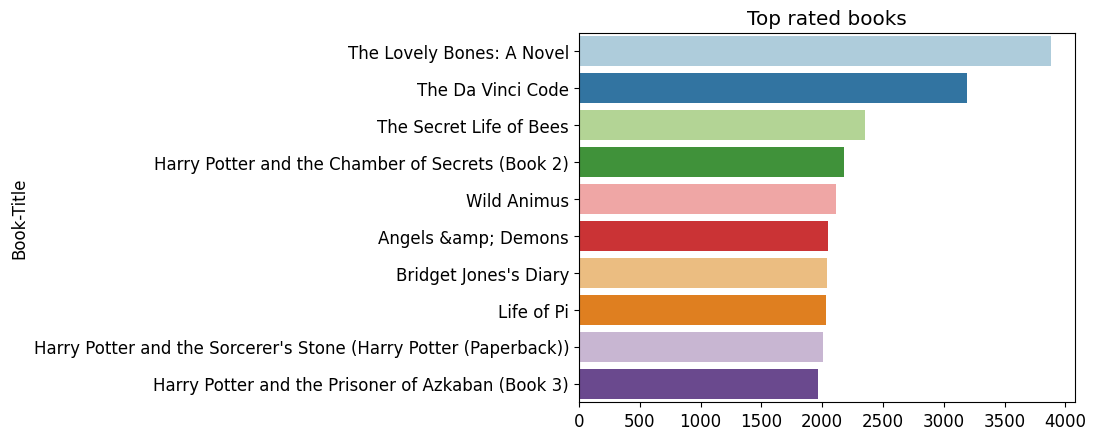

In [103]:
#Top-rated books
top_rated_books=new_data.groupby('Book-Title')['Book-Rating'].sum().nlargest(10)
sns.barplot(x=top_rated_books.values,y=top_rated_books.index,palette='Paired')
plt.title('Top rated books')

### Year-wise Count Of Books Published

In [104]:
plt.figure(figsize=(7,6))
sns.countplot(y='Year-Of-Publication', data=books_users_rating,order=books_users_rating['Year-Of-Publication'].value_counts().index[0:10])
plt.title('Yearwise count of Books published')

NameError: ignored

<Figure size 700x600 with 0 Axes>

### Countries With Most Readers

Text(0.5, 0, 'No of users')

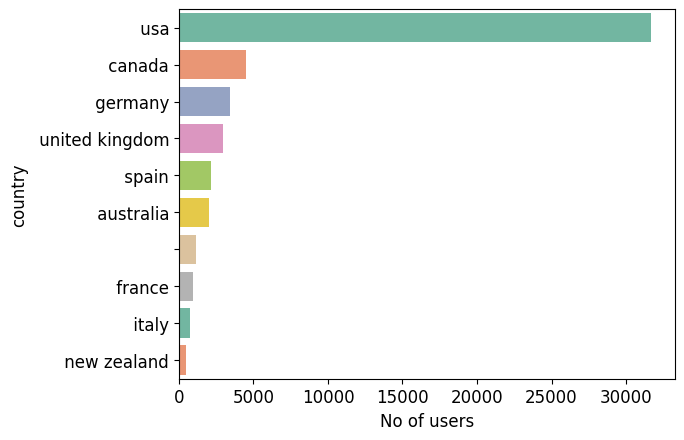

In [105]:
countries = new_data.groupby('country')['User-ID'].nunique().reset_index().sort_values(by='User-ID', ascending=False)[:10]
sns.barplot(data=countries, y='country', x='User-ID',palette='Set2')
plt.xlabel('No of users')

Most of the readers are from the United States

### State With Most Readers

Text(0.5, 0, 'No of users')

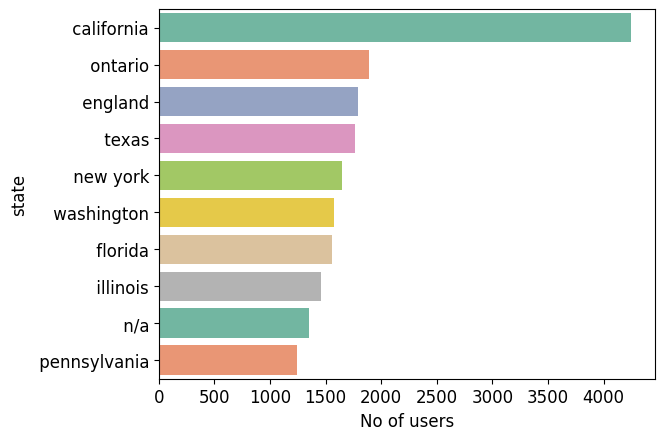

In [106]:
states = new_data.groupby('state')['User-ID'].nunique().reset_index().sort_values(by='User-ID', ascending=False)[:10]
sns.barplot(data=states, y='state', x='User-ID',palette='Set2')
plt.xlabel('No of users')

### Cities With Most Readers

Text(0.5, 0, 'No of users')

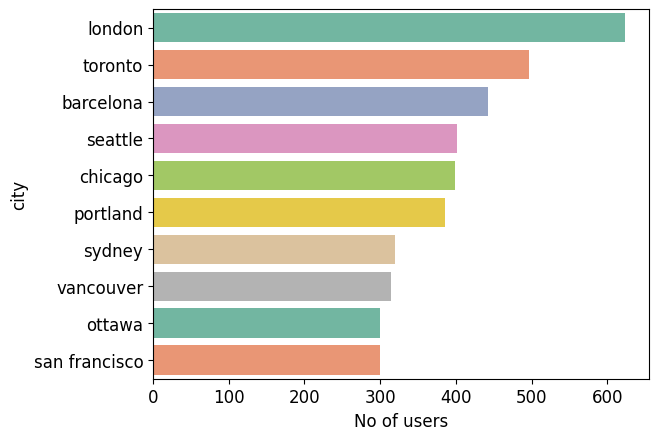

In [107]:
cities = new_data.groupby('city')['User-ID'].nunique().reset_index().sort_values(by='User-ID', ascending=False)[:10]
sns.barplot(data=cities, y='city', x='User-ID',palette='Set2')
plt.xlabel('No of users')

### Observations Based On Age Groups

In [108]:
def age_group(age):
  '''
  defines the age group of users
  '''
  if age<13.0:
    x='Children'
  elif age>=13.0 and age<18.0:
    x='Teens'
  elif age>=18.0 and age<36.0:
    x='Youth'
  elif age>=36.0 and age<56.0:
    x='Middle aged adults'
  else:
    x='Elderly'
  return x

In [110]:
new_data.head(5)

,User-ID,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,city,state,country
0,2,18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,stockton,california,usa
2,11400,49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,ottawa,ontario,canada
5,67544,30.0,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,toronto,ontario,canada
6,85526,36.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,victoria,british columbia,canada
7,96054,29.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,ottawa,ontario,canada


# **MODEL BUILDING AND FEATURE ENGINEERING**



# Popularity Based  Recommender system

- ### Top 50 books with highest average ratings

In [8]:
ratings.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [9]:
# merging books and ratings dataset on ISBN no attribute
ratings_with_name = ratings.merge(books,on='ISBN')

In [10]:
# creating a dataframe with book title and number of ratings on the book(Book-ratings)
# we will use reset_index() to form a dataframe otherwise it will be a list

num_rating = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Ã?lpiraten.,2
241067,Ã?Ã?rger mit Produkt X. Roman.,4
241068,Ã?Ã?sterlich leben.,1
241069,Ã?Ã?stlich der Berge.,3


In [11]:
# we will calculate the average rating using mean function

avg_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Ã?lpiraten.,0.000000
241067,Ã?Ã?rger mit Produkt X. Roman.,5.250000
241068,Ã?Ã?sterlich leben.,7.000000
241069,Ã?Ã?stlich der Berge.,2.666667


In [12]:
# Now the final dataframe will be popular_df after merging above two dataframes on Book Title attribute
popular_df = num_rating.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,Book-Rating,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Ã?lpiraten.,2,0.000000
241067,Ã?Ã?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Ã?sterlich leben.,1,7.000000
241069,Ã?Ã?stlich der Berge.,3,2.666667


- ### Considering those books whose book rating is more than 250

In [13]:
#filtering books with num_rating>250 and then sorting the books and displaying top 50 books
popular_df[popular_df['Book-Rating']>=250]

,Book-Title,Book-Rating,avg_rating
764,1984,284,4.454225
818,1st to Die: A Novel,509,3.575639
1048,2nd Chance,356,3.269663
1760,A Bend in the Road,346,3.364162
2281,"A Child Called \It\"": One Child's Courage to S...",265,4.086792
...,...,...,...
233850,White Oleander : A Novel,387,3.506460
233851,White Oleander : A Novel (Oprah's Book Club),356,3.772472
234740,Wicked: The Life and Times of the Wicked Witch...,326,3.766871
234951,Wild Animus,2502,1.019584


In [14]:
popular_df = popular_df[popular_df['Book-Rating']>=250].sort_values('avg_rating',ascending = False).head(50)

In [15]:
popular_df_final = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','Book-Rating']]

In [16]:
popular_df_final


,Book-Title,Book-Author,Image-URL-M,Book-Rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510


# Collaborative Filtering Based Recommender System

- ### Approach : We will select those users who have rated more than 200 books and select books which are rated by more than 50  users so as to get more accurate results for the model

In [17]:
users.shape

(278858, 3)

In [18]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [19]:
ratings.shape

(1149780, 3)

In [20]:
book_ratings = ratings.merge(books,on='ISBN')
book_ratings


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [21]:
book_ratings.groupby('User-ID').count()['Book-Rating']

User-ID
2          1
8         17
9          3
10         1
12         1
          ..
278846     1
278849     4
278851    23
278852     1
278854     8
Name: Book-Rating, Length: 92106, dtype: int64

In [22]:
x= book_ratings.groupby('User-ID').count()['Book-Rating']>200
x[x] #Boolean indexing

User-ID
254       True
2276      True
2766      True
2977      True
3363      True
          ... 
274308    True
275970    True
277427    True
277639    True
278418    True
Name: Book-Rating, Length: 811, dtype: bool

In [23]:
final_users = x[x].index
final_users

Int64Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,
              6323,   6543,
            ...
            271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427,
            277639, 278418],
           dtype='int64', name='User-ID', length=811)

In [24]:
filtered_rating = book_ratings[book_ratings['User-ID'].isin(final_users)]

In [25]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50

In [26]:
y[y]

Book-Title
1984                                                                 True
1st to Die: A Novel                                                  True
2nd Chance                                                           True
4 Blondes                                                            True
A Bend in the Road                                                   True
                                                                     ... 
Year of Wonders                                                      True
You Belong To Me                                                     True
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values    True
Zoya                                                                 True
\O\" Is for Outlaw"                                                  True
Name: Book-Rating, Length: 706, dtype: bool

In [27]:
y[y].index

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [28]:
famous_books=y[y].index

In [30]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [31]:
final_ratings


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1026724,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...
1027923,269566,0670809381,0,Echoes,Maeve Binchy,1986,Penguin USA,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...
1028777,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1029070,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...


In [34]:
Pivot = final_ratings.pivot_table(index='Book-Title',columns = 'User-ID',values = 'Book-Rating')

In [36]:
Pivot

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [35]:
Pivot.shape

(706, 810)

In [37]:
Pivot.fillna(0,inplace = True)

In [38]:
Pivot

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
from sklearn.metrics.pairwise import cosine_similarity

In [41]:
cosine_similarity(Pivot).shape

(706, 706)

In [42]:
sim_scors = cosine_similarity(Pivot)

In [44]:
np.where(Pivot.index=='1984')[0][0]

0

In [45]:
np.where(Pivot.index=='Zoya')[0][0]

704

In [46]:
sim_scors[0]

array([1.        , 0.10255025, 0.01220856, 0.        , 0.05367224,
       0.02774901, 0.08216491, 0.13732869, 0.03261686, 0.03667591,
       0.02322418, 0.06766487, 0.02083978, 0.09673735, 0.13388865,
       0.08303112, 0.11153543, 0.05100411, 0.02517784, 0.11706383,
       0.        , 0.14333793, 0.07847534, 0.06150451, 0.08723968,
       0.        , 0.07009814, 0.13658681, 0.07600328, 0.12167134,
       0.00768046, 0.01473221, 0.        , 0.07965814, 0.04522617,
       0.01556271, 0.09495938, 0.0182307 , 0.02610465, 0.07984012,
       0.11679969, 0.0569124 , 0.08354155, 0.08471898, 0.08785938,
       0.05491435, 0.0548505 , 0.27026514, 0.09779123, 0.06016046,
       0.08958835, 0.06748675, 0.        , 0.04468098, 0.01920872,
       0.        , 0.05629067, 0.00557964, 0.07877059, 0.05219479,
       0.18908177, 0.        , 0.01240656, 0.02984572, 0.04279502,
       0.12680125, 0.16566735, 0.        , 0.13357242, 0.06615478,
       0.        , 0.        , 0.        , 0.10968075, 0.02806

In [47]:
sorted(list(enumerate(sim_scors[0])),key = lambda x:x[1],reverse=True)

[(0, 0.9999999999999999),
 (47, 0.2702651417103732),
 (545, 0.2639619371123496),
 (82, 0.2366937434740099),
 (634, 0.23299389358170397),
 (551, 0.2262639743141286),
 (181, 0.22222254415660225),
 (500, 0.21057743765309012),
 (344, 0.20675540390454),
 (554, 0.20025063706783053),
 (520, 0.19972624710300058),
 (527, 0.19656287691544358),
 (488, 0.19511819825564608),
 (552, 0.1920889620576415),
 (318, 0.19182230688281934),
 (624, 0.18925313707609975),
 (598, 0.18921367782346202),
 (60, 0.18908176672188648),
 (622, 0.18571699439818884),
 (647, 0.1841081817659337),
 (546, 0.18408910419891056),
 (202, 0.18049207281616433),
 (541, 0.17990898085771034),
 (309, 0.17415730924332484),
 (588, 0.1738182944100774),
 (537, 0.17008719986228352),
 (544, 0.1672877700938274),
 (66, 0.16566734565340113),
 (118, 0.165272766123669),
 (269, 0.1650329228149958),
 (354, 0.16337845332530374),
 (476, 0.16104067376144765),
 (407, 0.16041182196659062),
 (590, 0.16000267935045498),
 (666, 0.1589387141616799),
 (92, 0

In [48]:
sorted(list(enumerate(sim_scors[0])),key = lambda x:x[1],reverse=True)[1:6]

[(47, 0.2702651417103732),
 (545, 0.2639619371123496),
 (82, 0.2366937434740099),
 (634, 0.23299389358170397),
 (551, 0.2262639743141286)]

# **Recommender with Feature Crafting**

# FEATURES:


Book Title:


Book_Ratings:


USERS_ID

In [59]:
def recommend (book_name):
  #index fetch
  index = np.where(Pivot.index==book_name)[0][0]
  similar_items = sorted(list(enumerate(sim_scors[index])),key = lambda x:x[1],reverse=True)[1:6]
  for i in similar_items:
    print(Pivot.index[i[0]])

In [60]:
##Here we have created a recommender
##TRIAL -1
recommend('2nd Chance')

Four Blind Mice
The Next Accident
Violets Are Blue
The Murder Book
Flesh and Blood


In [61]:
## TRIAL - 2
recommend('You Belong To Me')
##As you can see output below, These are the five book are recommend by our recommender.

Loves Music, Loves to Dance
I'll Be Seeing You
Before I Say Good-Bye
Daddy's Little Girl
All Around the Town


# **Recommendation Using KNN algorithm**

In [62]:
from scipy.sparse import csr_matrix

Book_features_df_matrix = csr_matrix(Pivot.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine',algorithm='brute')
model_knn.fit(Book_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [66]:
query_index =np.random.choice(Pivot.shape[0])
print(query_index)
distances,indices = model_knn.kneighbors(Pivot.iloc[query_index,:].values.reshape(1,-1),n_neighbors=5)

268


In [74]:
Pivot.iloc[268]

User-ID
254       0.0
2276      0.0
2766      0.0
2977      0.0
3363      0.0
         ... 
274308    0.0
275970    0.0
277427    0.0
277639    0.0
278418    0.0
Name: Intensity, Length: 810, dtype: float64

In [67]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(Pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, Pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Intensity:

1: Dolores Claiborne, with distance of 0.6516671098218629:
2: Toxin, with distance of 0.6841725590716354:
3: Misery, with distance of 0.6858854845459854:
4: From the Corner of His Eye, with distance of 0.7038544361018486:
